In [23]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [34]:
wine = pd.read_csv('winequality-red.csv')
X = wine.drop(columns=['quality'])
y = wine['quality']

In [35]:
# Perform feature selection to remove low variance features
selector = VarianceThreshold(threshold=0.2)
X_selected = selector.fit_transform(X)

# Perform preprocessing on the selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

In [36]:
# Perform PCA on the preprocessed dataset
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply clustering on the reduced dataset
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)
y_pred = kmeans.predict(X_pca)

In [37]:
# Performance analysis
silhouette_avg = silhouette_score(X_pca, y_pred)
db_score = davies_bouldin_score(X_pca, y_pred)
print(f'Silhouette Score: {silhouette_avg:.3f}')
print(f'Davies Bouldin Score: {db_score:.3f}')

Silhouette Score: 0.388
Davies Bouldin Score: 0.872


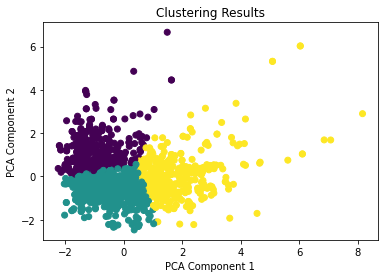

In [38]:
# Plot the clustering results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.title('Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

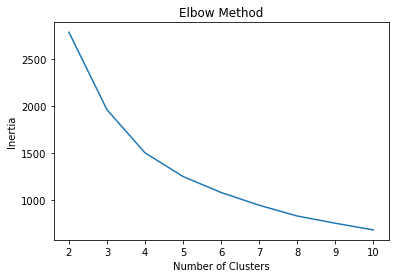

In [39]:
# Error analysis
errors = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    errors.append(kmeans.inertia_)
plt.plot(range(2, 11), errors)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()